# Module 9 Activity

In the lecture notes we have discussed many types of Machine Learning algorithms and how to implement them. An important next step in understand models is to diagnose and address issues with the model performance. Validation curves are a powerful tool in the machine learning workflow, helping to diagnose and address issues like overfitting, underfitting, and the adequacy of the dataset size. Understanding how these curves work can guide you in making informed adjustments to your model.

__Validation curves__ plot training and validation scores (such as accuracy, F1 score, etc.) against varying values of a model parameter or the number of training examples. This graphical representation helps in understanding how changes in the model's complexity or the training set size affect its performance.

__Overfitting__ occurs when a model performs well on the training data but poorly on unseen data (validation set). In a validation curve, overfitting is indicated when the training score is high but the validation score is significantly lower, especially as the model complexity increases.

__Underfitting__ is when a model cannot capture the underlying pattern of the data, resulting in poor performance on both the training and validation datasets. On a validation curve, underfitting is shown by both training and validation scores being low but possibly converging at a point of low complexity.

Your task for this activity is to use the MNIST training dataset (train.csv file) to create a random forest classifier and create validation curves to determine if any underfitting or overfitting has occured. You may want to reduce the dataset by some factor to help with processing speed. Ensure you have a representative set and account for both the $X$ and $y$ values. 

In [2]:
# Import needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import random

In [3]:
# Load MNIST data from a CSV file
mnist_df = pd.read_csv('train.csv')
mnist_df.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pi

In [4]:
# Extract features (pixel values) and labels from the DataFrame
X, y = mnist_df["label"], mnist_df.drop(columns=["label"])
X.shape

(42000,)

In [5]:
y.shape

(42000, 784)

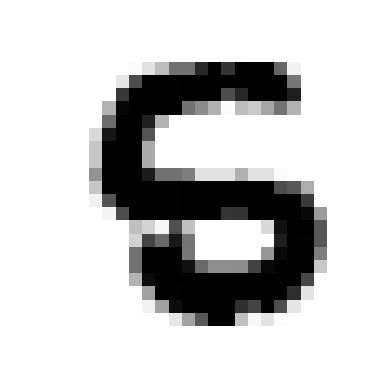

In [6]:
some_digit = y.to_numpy()[random.randint(0, y.shape[1])]

#Reshape the digit into a 28 x 28 pixel array to display.
some_digit_image = some_digit.reshape(28, 28)

#Plot digit

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

y = y.astype(np.uint8)

In [7]:
# Reduce the dataset to 10% by selecting samples
random.seed(42)

# Calculate 10% of the dataframe's length
sample_size = int(len(mnist_df) * 0.1)

# Randomly select 10% of the rows
mnist_df_sampled = mnist_df.sample(n=sample_size, random_state=42)

mnist_df_sampled.head

<bound method NDFrame.head of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
5457       8       0       0       0       0       0       0       0       0   
38509      1       0       0       0       0       0       0       0       0   
25536      9       0       0       0       0       0       0       0       0   
31803      9       0       0       0       0       0       0       0       0   
39863      8       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
16041      4       0       0       0       0       0       0       0       0   
4867       2       0       0       0       0       0       0       0       0   
28123      7       0       0       0       0       0       0       0       0   
3780       7       0       0       0       0       0       0       0       0   
7155       5       0       0       0       0       0       0       0       0   

       pi

In [8]:
# Split the data into training and testing sets (80-20 split)
# Assuming your dataframe is mnist_df

X, y = mnist_df_sampled["label"], mnist_df_sampled.drop(columns=["label"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.head

<bound method NDFrame.head of 7576     3
22316    7
30287    6
11082    5
28540    2
        ..
2385     0
24318    2
672      8
17516    0
34670    0
Name: label, Length: 3360, dtype: int64>

In [9]:
X_test.head

<bound method NDFrame.head of 6994     5
18670    0
31103    5
12006    5
7852     4
        ..
12604    6
1608     4
38035    8
4630     1
22108    1
Name: label, Length: 840, dtype: int64>

In [10]:
y_train.head

<bound method NDFrame.head of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
7576        0       0       0       0       0       0       0       0       0   
22316       0       0       0       0       0       0       0       0       0   
30287       0       0       0       0       0       0       0       0       0   
11082       0       0       0       0       0       0       0       0       0   
28540       0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
2385        0       0       0       0       0       0       0       0       0   
24318       0       0       0       0       0       0       0       0       0   
672         0       0       0       0       0       0       0       0       0   
17516       0       0       0       0       0       0       0       0       0   
34670       0       0       0       0       0       0       0       0       0  

In [11]:
y_test.head

<bound method NDFrame.head of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
6994        0       0       0       0       0       0       0       0       0   
18670       0       0       0       0       0       0       0       0       0   
31103       0       0       0       0       0       0       0       0       0   
12006       0       0       0       0       0       0       0       0       0   
7852        0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
12604       0       0       0       0       0       0       0       0       0   
1608        0       0       0       0       0       0       0       0       0   
38035       0       0       0       0       0       0       0       0       0   
4630        0       0       0       0       0       0       0       0       0   
22108       0       0       0       0       0       0       0       0       0  

In [12]:
X_test.head

<bound method NDFrame.head of 6994     5
18670    0
31103    5
12006    5
7852     4
        ..
12604    6
1608     4
38035    8
4630     1
22108    1
Name: label, Length: 840, dtype: int64>

In [13]:
# Create a Random Forest classifier (use the sklearn built-in)

# If X and y are Series, convert them to DataFrames
if isinstance(X, pd.Series):
    X = X.to_frame()
if isinstance(y, pd.Series):
    y = y.to_frame()

# Make sure the splits are DataFrames
X_train, X_test = X_train.to_frame(), X_test.to_frame()




In [14]:
from sklearn.metrics import make_scorer, accuracy_score

def custom_scorer(y_true, y_pred):
    # Custom scoring to handle multioutput
    # Ensure y_true and y_pred are numpy arrays
    y_true = y_true.values if isinstance(y_true, pd.DataFrame) else y_true
    y_pred = y_pred.values if isinstance(y_pred, pd.DataFrame) else y_pred
    scores = [accuracy_score(y_true[:, i], y_pred[:, i]) for i in range(y_true.shape[1])]
    return sum(scores) / len(scores)

custom_accuracy = make_scorer(custom_scorer, greater_is_better=True)

rf = RandomForestClassifier()
#rf.fit(X_train, y_train)

train_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring=custom_accuracy)

print("Cross-validation scores:", train_scores)
print("Average cross-validation score:", train_scores.mean())

Cross-validation scores: [0.80848556 0.81079173 0.81352117 0.81253796 0.81202928]
Average cross-validation score: 0.8114731383624878


In [15]:
test_scores = cross_val_score(rf, X_test, y_test, cv=5, scoring=custom_accuracy)
print("Cross-validation scores:", test_scores)
print("Average cross-validation score:", test_scores.mean())

Cross-validation scores: [0.80947826 0.81847516 0.81776148 0.80928845 0.80647929]
Average cross-validation score: 0.8122965257531585


In [ ]:
# Create and plot validation curves for the Random Forest classifier

train_scores, test_scores = validation_curve(
    RandomForestClassifier(),
    X, y,
    param_name="n_estimators",
    param_range=np.arange(1, 250, 2),
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

print(f"The average train accuracy is {train_scores.mean():.2f}")
print(f"The average test accuracy is {test_scores.mean():.2f}")

Please add your Jupyter Notebook in HTML format to the discussion board found under Module 9. You are encouraged to review other students' submissions to check and discuss differences in your approaches. 